#=== Descriptive Analytics ===



>>>> oleh Lena Rosmayani

---





## 1. Import Library



In [ ]:
import numpy as np #library untuk matematika
import pandas as pd #library untuk dataframe
import seaborn as sns #library untuk visualisasi
import matplotlib.pyplot as plt

## 2. Load data




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/dataset/Sales_data.csv")

## 3. Memahami data yang dimiliki



In [ ]:
# Melihat informasi banyak data
dataset.shape

(9994, 9)

In [ ]:
#Melihat 5 data pertama untuk mendapatkan gambaran data yang dimiliki
dataset.head()

Order Date  Customer Name         State         Category Sub-Category  \
0  03-01-2014  Darren Powers         Texas  Office Supplies        Paper   
1  04-01-2014  Phillina Ober      Illinois  Office Supplies       Labels   
2  04-01-2014  Phillina Ober      Illinois  Office Supplies      Storage   
3  04-01-2014  Phillina Ober      Illinois  Office Supplies      Binders   
4  05-01-2014     Mick Brown  Pennsylvania  Office Supplies          Art   

                                        Product Name   Sales  Quantity  Profit  
0  Message Book, Wirebound, Four 5 1/2" X 4" Form...   16.45         2    5.55  
1                                          Avery 508   11.78         3    4.27  
2                      SAFCO Boltless Steel Shelving  272.74         3  -64.77  
3         GBC Standard Plastic Binding Systems Combs    3.54         2   -5.49  
4  Avery Hi-Liter EverBold Pen Style Fluorescent ...   19.54         3    4.88

In [ ]:
# Melihat informasi tipe data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order Date     9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   State          9994 non-null   object 
 3   Category       9994 non-null   object 
 4   Sub-Category   9994 non-null   object 
 5   Product Name   9994 non-null   object 
 6   Sales          9994 non-null   float64
 7   Quantity       9994 non-null   int64  
 8   Profit         9994 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 702.8+ KB


  **Observasi tipe data**

 semua tipe data kolom sudah sesuai kecuali kolom "Order Date" yang seharusnya berupa tipe data datetime. Maka dari itu tipe data pada kolom tersebut harus diubah.




In [ ]:
# ubah tipe data yang tanggal dari object jadi datetime
import datetime as dt
dataset['Order Date'] = pd.to_datetime(dataset['Order Date'])
dataset['Order Date'] = dataset['Order Date'].dt.date.astype("datetime64[ns]")

<ipython-input-45-dae6fc5d34f3>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataset['Order Date'] = pd.to_datetime(dataset['Order Date'])


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Date     9994 non-null   datetime64[ns]
 1   Customer Name  9994 non-null   object        
 2   State          9994 non-null   object        
 3   Category       9994 non-null   object        
 4   Sub-Category   9994 non-null   object        
 5   Product Name   9994 non-null   object        
 6   Sales          9994 non-null   float64       
 7   Quantity       9994 non-null   int64         
 8   Profit         9994 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 702.8+ KB


In [ ]:
# Melihat data null/missing value
dataset.isnull().sum()

Order Date       0
Customer Name    0
State            0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Profit           0
dtype: int64

## 4. Statistik deskriptif dengan fungsi describe()

In [ ]:
# Ringkasan statistik dari kolom dengan tipe data numerik
dataset.describe()

Sales     Quantity       Profit
count   9994.000000  9994.000000  9994.000000
mean     229.858022     3.789574    28.656973
std      623.245131     2.225110   234.260203
min        0.440000     1.000000 -6599.980000
25%       17.280000     2.000000     1.730000
50%       54.490000     3.000000     8.665000
75%      209.940000     5.000000    29.360000
max    22638.480000    14.000000  8399.980000

In [ ]:
# Ringkasan statistik dari kolom dengan tipe data karakter
dataset.describe(include=['object'])

Customer Name       State         Category Sub-Category  \
count            9994        9994             9994         9994   
unique            793          49                3           17   
top     William Brown  California  Office Supplies      Binders   
freq               37        2001             6026         1523   

           Product Name  
count              9994  
unique             1850  
top     Staple envelope  
freq                 48

## 5. Perhitungan ukuran tendensi sentral

- Pada bagian ini, saya akan menghitung ukuran tendensi sentral mean, median dan mode.

- Statistik ini memberi perkiraan nilai tengah variabel numerik.

- Saya akan menggunakan variabel Profit (dalam "ribu" dollar) untuk penghitungan

### Modus, Median, Mean

In [ ]:
#Menghitung modus
modus = dataset["Profit"].mode()
print(f"Modus  = {modus} (bisa lebih dari satu nilai atau bimodus)" )

#Menghitung median
median = dataset["Profit"].median()
print(f"Median = {median}")

#Memghitung mean
mean = dataset["Profit"].mean()
print(f"Mean   = {mean}")

Modus  = 0    0.0
Name: Profit, dtype: float64 (bisa lebih dari satu nilai atau bimodus)
Median = 8.665
Mean   = 28.656973183910345


**Observasi**

Kita dapat melihat pada distribusi ini mean lebih besar dari median dan median lebih besar dari modus (mean > median > modus). Distribusi tersebut disebut menjulur ke kanan (skewed to the right) atau mempunyai kemencengan yang positif (positive skewness).  Untuk distribusi yang menceng kanan, data cenderung mengelompok pada sebelah kiri distribusi.

<ipython-input-75-fc09e8ac63a4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Profit"], bins=10, hist=True, kde=True, label = 'Profit')


<Axes: xlabel='Profit', ylabel='Density'>

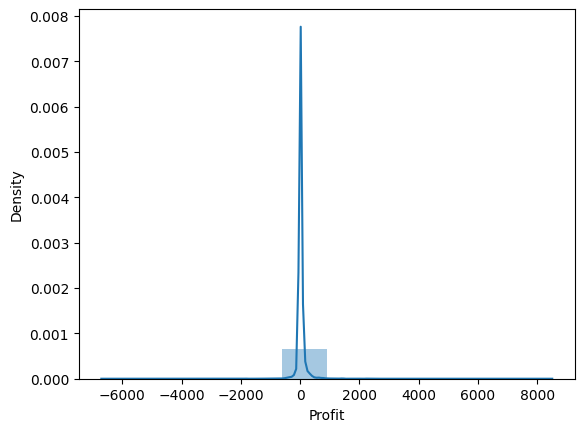

In [ ]:
# Membuat plot distribusi
sns.distplot(dataset["Profit"], bins=10, hist=True, kde=True, label = 'Profit')

## 7. Perhitungan ukuran dispersi atau variabilitas

### Statistik Lima Serangkai

In [ ]:
#Menghitung var
minimum = dataset["Profit"].min()
print(f"Nilai minimum   = {minimum}")

Q1 = dataset["Profit"].quantile(0.25)
print(f"Nilai Q1        = {Q1}")

Q2 = dataset["Profit"].quantile(0.5)
print(f"Nilai Q2        = {Q2}")

Q3 = dataset["Profit"].quantile(0.75)
print(f"Nilai Q3        = {Q3}")

maksimum = dataset["Profit"].max()
print(f"Nilai maksimum  = {maksimum}")

Nilai minimum   = -6599.98
Nilai Q1        = 1.73
Nilai Q2        = 8.665
Nilai Q3        = 29.36
Nilai maksimum  = 8399.98


### Variance dan Standard Deviasi

In [ ]:
#Menghitung var
var = dataset["Profit"].var()
print(f"Variance  = {var}")

#Menghitung median
std = dataset["Profit"].std()
print(f"Standard Deviasi = {std}")

#Apakah sama?
print(np.sqrt(var) == std)

Variance  = 54877.84265771428
Standard Deviasi = 234.26020288925363
True


### Jangkauan, IQR, dan Persentil

In [ ]:
jangkauan = maksimum - minimum
print(f"Nilai jangkauan = {jangkauan}")

iqr = Q3 - Q1
print(f"Nilai IQR  = {iqr}")

#Persentil 50 = Median
print(median == Q2)

#Persentil 0 = Minimum dan Persentil 100 = Maksimum
print(minimum == dataset["Profit"].quantile(0))
print(maksimum == dataset["Profit"].quantile(1))

Nilai jangkauan = 14999.96
Nilai IQR  = 27.63
True
True
True


## Outliers, Boxplot, dan Histogram

### Outliers

In [ ]:
batas_bawah = Q1 - 1.5 * iqr
batas_atas = Q3 + 1.5 * iqr

In [ ]:
print(f"outliers minior < {batas_bawah}")
print(f"outliers mayor > {batas_atas}")

outliers minior < -39.715
outliers mayor > 70.805


### Boxplot

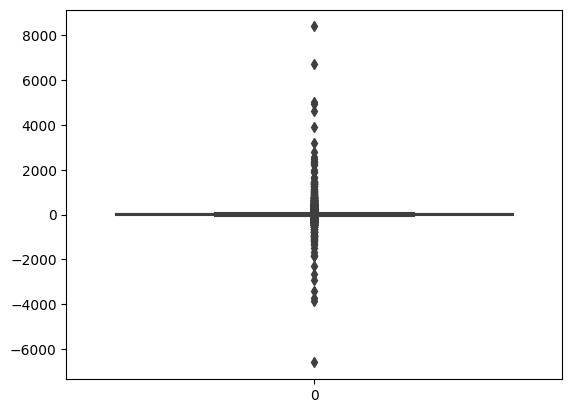

In [ ]:
#Membuat boxplot
sns.boxplot(dataset["Profit"])
plt.show()

## 8. Perhitungan ukuran bentuk distribusi

### Kemiringan (Skewness)

In [ ]:
dataset["Profit"].skew()

7.561436553386433

Kemiringannya 7.5614 lebih besar dari 1. Oleh karena itu, kita dapat menyimpulkan bahwa data Profit memiliki kemiringan yang sangat tinggi.

### Kurtosis

In [ ]:
dataset["Profit"].kurt()

397.1883461261031

kurtosisnya 397.1883 > 3 sehingga kita dapat menyimpulkan bahwa kurva Profit adalah kurva leptokurtik. Dibandingkan dengan distribusi normal, puncak pusatnya lebih tinggi dan tajam seperti yang terlihat pada plot distribusi data profit sebelumnya.